## Очистка данных.  

>**Очистка данных** (`data cleaning`) — это процесс обнаружения и удаления (или исправления) повреждённых, ложных или неинформативных записей таблицы или целой базы данных. Процесс состоит из двух этапов: поиск и ликвидация (или редактирование).

[Норм статья по очистке](https://proglib.io/p/moem-dataset-rukovodstvo-po-ochistke-dannyh-v-python-2020-03-27)

### Задания <a class="anchor" id=0></a>
- [1. Введение](#1)
- [2. Новые данные: о квартирах от Сбера](#2)
- [3. Работа с пропусками: как их обнаружить?](#3)
- [4. Работа с пропусками: методы обработки](#4)
- [5. Выбросы: почему появляются, чем опасны?](#5)
- [6. Выбросы: методы выявления](#6)
- [6.1 Ручное выявление](#6-1)
- [6.2 Выбросы: метод Тьюке](#6-2)
- [6.3 Выбросы: метод Сигм](#6-3)
- [6.4 Выбросы: практика](#6-4)
- [7. Работа с дубликатами и неинформативными признаками](#7)
- [7.1 Ликвидация дубликатов](#7-1)
- [7.2 Ликвидация неинформативных признаков](#7-2)
- [8. Закрепление знаний](#8)
- [9. Итоги](#9)

**Цель очистки данных** — избавиться от «мусора», который может помешать моделированию или исказить его результаты. Во многих задачах очистка данных — это самая главная часть этапа подготовки данных к построению модели, которая нередко занимает большую часть времени работы над задачей.

**Сложность очистки** и, соответственно, время, затраченное на неё, зависят от сложности задачи и размера данных. Чем больше у вас источников данных, тем больше вероятность того, что необходимо будет проводить тщательную очистку. 

**Время**, которое специалист тратит на очистку, довольно индивидуально и зависит ещё и от его навыков. В среднем при работе с данными оно занимает около 40-60 % от общего времени работы с данными (включая построение модели).

Нередко оказывается так, что начинающие специалисты пропускают этот этап, сразу переходя к построению своей глубочайшей нейронной сети с невероятно сложной архитектурой и современными наворотами. Однако в результате есть риск столкнуться либо с ошибкой выполнения кода, либо переобученной под «мусор» моделью, предсказания которой мало сопоставимы с действительностью. 

>**Вспомните поговорку: «мусор на входе — мусор на выходе».**

<img src=p_14_img1.png>


Нетрудно заметить, **как сильно аномалии влияют на результат** моделирования и искажают его. Вторая прямая более точно описывает зависимость, нежели первая, хотя разница в данных составляет лишь пять исключённых из рассмотрения наблюдений.

>На руках у нас будет куча таблиц в разных форматах, которые необходимо грамотно объединить. Но и это — не наша главная проблема. 

### Цели модуля:

- **Рассмотреть** методы определения пропусков в данных и основные методики работы с ними.
- **Познакомиться** с методами поиска выбросов в данных и рассмотреть основные практики работы с ними.
- **Научиться** определять дубликаты и неинформативные признаки в данных и избавляться от них.

[к содержанию](#0)

## 2. Новые данные: о квартирах от Сбера<a class="anchor" id=2></a>

>В этом модуле мы с вами будем работать с данными с самого настоящего соревнования на платформе `Kaggle`, инициатором которого стал Сбер. Соревнование проводилось в 2017 году, его призовой фонд составил 25 000 $. Требования Сбера состояли в построении модели, которая бы прогнозировала цены на жильё в Москве, опираясь на параметры самого жилья, а также состояние экономики и финансового сектора в стране.

Датасет представляет собой набор данных из таблицы с информацией о параметрах жилья (`train.csv`). В ней содержатся 292 признака о состоянии экономики России на момент продажи недвижимости (`macro.csv`). 

Для упрощения техники очистки данных мы будем отрабатывать на урезанном датасете.
[Ссылка](https://lms.skillfactory.ru/assets/courseware/v1/fbb2e41c55afd1333f7f87e91e904e9f/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/sber_data.zip)

Он содержит информацию о 61 признаке. Их значение мы будем объяснять в процессе работы с данными.

Импортируем библиотеки, которые нам понадобятся (pandas для работы с данными, numpy для математических преобразований, matplotlib и seaborn для визуализации):


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sber_data = pd.read_csv('sber_data.csv')
display(sber_data)


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000


In [4]:
print(f'Количество строк в таблице: {sber_data.shape[0]}')
print(f"Максимальная стоимость квартиры: {sber_data['price_doc'].max()}")

Количество строк в таблице: 30471
Максимальная стоимость квартиры: 111111112


<Axes:xlabel='ecology'>

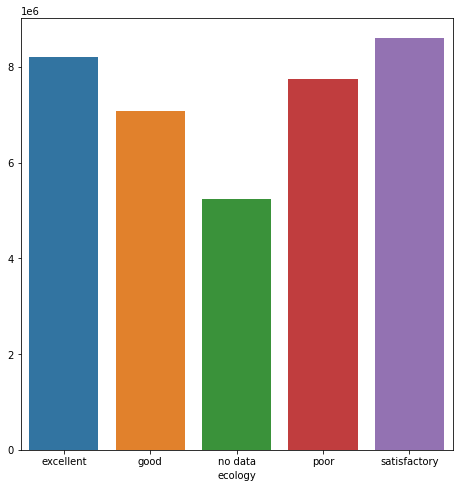

In [4]:
# Зависимость цены (price_doc) от экологической олбстановки (ecology)
plot_data = sber_data.groupby(by='ecology')['price_doc'].mean()
fig = plt.figure(figsize=(6, 6))
axes = fig.add_axes([0, 0, 1, 1])
barplot = sns.barplot(
    x=plot_data.index,
    y=plot_data.values
)
barplot

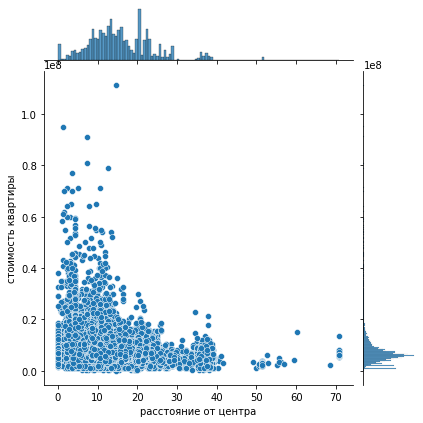

In [5]:
scatter_data = sber_data[['kremlin_km','price_doc']]
scatter = sns.jointplot(
    data=scatter_data,
    x='kremlin_km',
    y='price_doc',
)
scatter.set_axis_labels('расстояние от центра','стоимость квартиры')   

[к содержанию](#0)

## 3. Работа с пропусками: как их обнаружить?<a class="anchor" id=3></a>

>Работа с отсутствующими записями в таблице, пожалуй, одна из самых сложных и неоднозначных. Она же — самая распространённая для реальных данных. С неё мы и начнём!

В `pandas` пропуски обозначаются специальным символом `NaN` (Not-a-Number — «не число»).

Искать пропуски позволяет метод [isnull()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html). Этот метод возвращает новый DataFrame, в ячейках которого стоят булевы значения True и False. True ставится на месте, где ранее находилось значение NaN.


In [7]:
display(sber_data.isnull())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


>Как вы сами понимаете, результат метода `isnull()` — это, мягко говоря, не самый удобный метод поиска пропусков, однако он является промежуточным этапом других способов, которые мы рассмотрим далее.

### СПИСОК СТОЛБЦОВ С ПРОПУСКАМИ

Первый способ — это вывести на экран названия столбцов, где число пропусков больше 0. 

Для этого вычислим средний по столбцам результат метода `isnull()`. Получим долю пропусков в каждом столбце.

Умножаем на 100 %, находим столбцы, где доля пропусков больше 0, сортируем по убыванию и выводим результат:

In [6]:
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

Итак, можно увидеть, что у нас большое число пропусков (более 47 %) в столбце `hospital_beds_raion` (количество больничных коек в округе). 

Далее у нас идут столбцы с числом пропусков чуть больше 20 %: 

* `preschool_quota` (число мест в детском саду в районе);
* `school_quota` (число мест в школах в районе);
* `life_sq` (жилая площадь здания в квадратных метрах). 

Менее одного процента пропусков содержат признаки:

* `floor` (число этажей в доме);
* `metro_min_walk` (время от дома до ближайшего метро пешком в минутах);
* `metro_km_walk` (расстояние до ближайшего метро в километрах);
* `railroad_station_walk_km` (расстояние до ближайшей ж. д. станции в километрах);
* `railroad_station_walk_min` (время до ближайшей ж. д. станции пешком в минутах). 

>Эти соотношения дают базовое понимание, какие дальнейшие преобразования со столбцами предстоит производить. Например, уже сейчас ясно, что столбец, в котором почти **половина данных пропущена, не может дать нам полезной информации** при прогнозировании. Если мы попытаемся его как-то исправить, мы можем только навредить и «нафантазировать» лишнего, поэтому от него, возможно, стоит избавиться. А вот столбцы с менее 1 % пропусков легко можно скорректировать: заполнить отсутствующие значения какими-то числами.

### СТОЛБЧАТАЯ ДИАГРАММА ПРОПУСКОВ

Иногда столбцов с пропусками становится слишком много и прочитать информацию о них из списка признаков с цифрами становится слишком затруднительно — цифры начинают сливаться воедино. 

Можно воспользоваться столбчатой диаграммой, чтобы визуально оценить соотношение числа пропусков к числу записей. Самый быстрый способ построить её — использовать метод `plot()`:

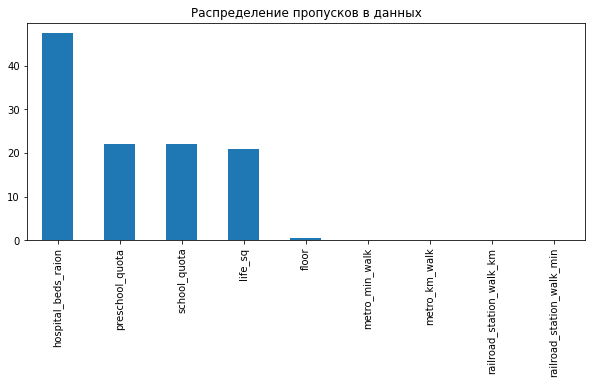

In [7]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

### ТЕПЛОВАЯ КАРТА ПРОПУСКОВ

Её часто используют, когда столбцов с пропусками не так много **(меньше 10)**. Она позволяет понять не только соотношение пропусков в данных, но и их характерное местоположение в таблице. 

Для создания такой тепловой карты можно воспользоваться результатом метода isnull(). Ячейки таблицы, в которых есть пропуск, будем отмечать жёлтым цветом, а остальные — синим. Для этого создадим собственную палитру цветов тепловой карты с помощью метода [color_pallete()](https://seaborn.pydata.org/generated/seaborn.color_palette.html) из библиотеки seaborn.

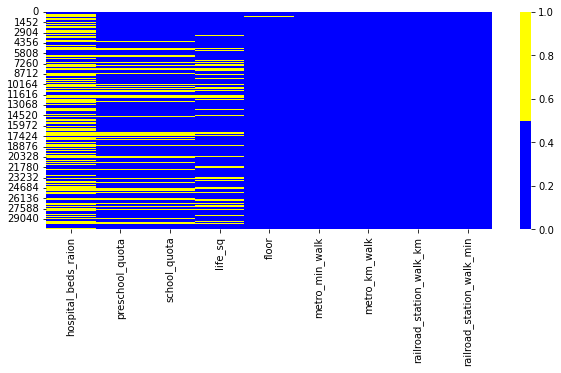

In [10]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

На полученной тепловой карте мы не видим чётких процентных соотношений для числа пропусков в данных, однако мы можем увидеть места их концентрации в таблице. Например, видно, что признаки `preschool_quota` и `school_quota` очень сильно связаны друг с другом по части пропусков: во всех записях, где хотя бы один не определён, не указан и второй (жёлтые линии для двух этих признаков полностью совпадают друг с другом).

[к содержанию](#0)

## 4. Работа с пропусками: методы обработки<a class="anchor" id=4></a>

**Универсального метода нет** - всё сильно зависит от ситуации

### ОТБРАСЫВАНИЕ ЗАПИСЕЙ И ПРИЗНАКОВ

Удаляем записи где есть пропуски

>Здесь важно правильно выбрать ось удаления: если мы избавимся от большого числа строк, то рискуем потерять важные данные, а если мы удалим столбцы, то можем потерять важные признаки.

<img src=p_14_img2.png>

Прежде всего порассуждаем логически: в столбце `hospital_beds_raion` **более 47 % пропусков**. Если мы будем удалять все строки, в которых этот признак пропущен, мы потеряем почти половину наших данных! 

Правильнее будет **просто удалить столбец**, ведь число мест в районных больницах — это не самый информативный признак для определения цены квартиры.

А вот если мы удалим весь столбец `metro_km_walk`, где менее 1 % пропусков, то потеряем полезный признак при формировании прогноза цены, ведь расстояние до ближайшего метро — это важный фактор при выборе квартиры. В данном случае лучше будет удалить сами записи.

>Специалисты рекомендуют при использовании метода удаления придерживаться следующих правил: удаляйте столбец, если число пропусков в нем **более 30-40 %**. В остальных случаях лучше удалять записи.

Для удаления строк и столбцов будем использовать метод [dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html), который позволяет удалять пропуски с тонким подходом к настройке. 

Основные параметры метода:

- `axis` — ось, по которой производится удаление (по умолчанию 0 — строки).
- `how` — как производится удаление строк (`any` — если хотя бы в одном из столбцов есть пропуск, стоит по умолчанию; `all` — если во всех столбцах есть пропуски). 
- `thresh` — порог удаления. Определяет минимальное число непустых значений в строке/столбце, при котором она/он сохраняется. Например, если мы установим `thresh` в значение 2, то мы удалим строки, где число пропусков 2 и более, где 2 число признаков (если `axis=0`).

Предварительно создадим копию исходной таблицы — `drop_data`, чтобы не повредить её. Зададимся порогом в 70 %: будем оставлять только те столбцы, **в которых 70 и более** процентов записей не являются пустыми . После этого удалим записи, в которых содержится хотя бы один пропуск. Наконец, выведем информацию о числе пропусков и наслаждаемся нулями. 

In [12]:
#создаем копию исходной таблицы
drop_data = sber_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(how='any', thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
display(drop_data.isnull().mean())
print(drop_data.shape)

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

(20888, 60)


### ЗАПОЛНЕНИЕ НЕДОСТАЮЩИХ ЗНАЧЕНИЙ КОНСТАНТАМИ

Чаще всего пустые места заполняют **средним/медианой/модой** для числовых признаков и модальным значением для категориальных признаков. 

<img src=p_14_img3.png>

Вся сложность заключается в выборе метода заполнения. Важным фактором при выборе метода является распределение признаков с пропусками. Давайте выведем их на экран. 

В pandas это можно сделать с помощью метода `hist()`:

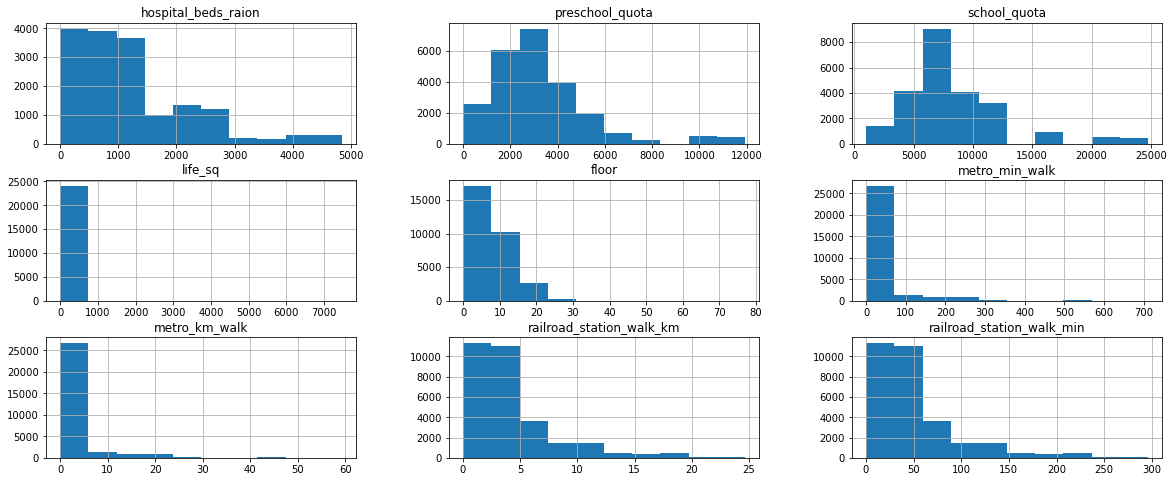

In [14]:
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20, 8));

Итак, рассмотрим несколько рекомендаций.

* Для распределений, похожих на логнормальное, где пик близ нуля, а далее наблюдается постепенный спад частоты, высока вероятность наличия выбросов (о них мы поговорим чуть позже). Математически доказывается, что среднее очень чувствительно к выбросам, а вот медиана — нет. Поэтому предпочтительнее использовать **медианное значение** для таких признаков.
* Если признак числовой и дискретный (например, число этажей, школьная квота), то их заполнение средним/медианой является ошибочным, так как может получиться число, которое не может являться значением этого признака. Например, количество этажей — целочисленный признак, а расчёт среднего может дать 2.871. Поэтому такой признак заполняют **либо модой, либо округляют до целого числа** (или нужного количества знаков после запятой) **среднее/медиану**.
* Категориальные признаки заполняются либо **модальным значением**, либо, если вы хотите оставить информацию о пропуске в данных, значением **'unknown'**. На наше счастье, пропусков в категориях у нас нет.
* Иногда в данных бывает такой признак, основываясь на котором, можно заполнить пропуски в другом. Например, в наших данных есть признак `full_sq` (общая площадь квартиры). Давайте исходить из предположения, что, если жилая площадь (`life_sq`) неизвестна, **то она будет равна суммарной площади!**

Заполнение значений осуществляется с помощью метода [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). Главный параметр метода — `value` (значение, на которое происходит заполнение данных в столбце). Если метод вызывается от имени всего DataFrame, то в качестве `value` можно использовать словарь, **где ключи — названия столбцов таблицы, а значения словаря — заполняющие константы**. 

Создадим такой словарь, соблюдая рекомендации, приведённые выше, а также копию исходной таблицы. Произведём операцию заполнения с помощью метода `fillna()` и удостоверимся, что пропусков в данных больше нет:

In [15]:
#создаем копию исходной таблицы
fill_data = sber_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()

id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

Посмотрим, на то, как изменились распределения наших признаков:

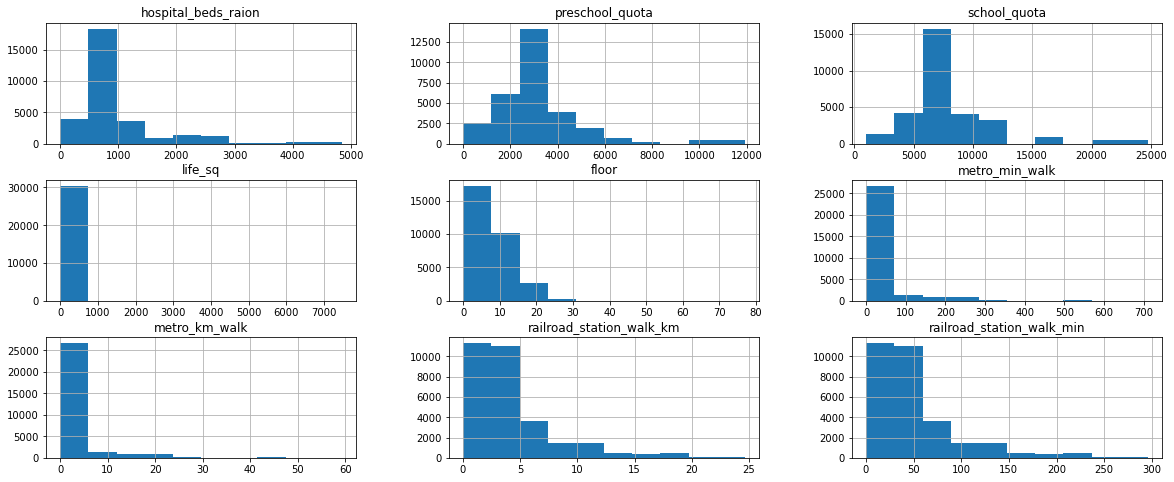

In [16]:
cols = cols_with_null.index
fill_data[cols].hist(figsize=(20, 8));

Обратите внимание на то, как сильно изменилось распределение для признака `hospital_beds_raion`. Это связано с тем, что мы заполнили модальным значением **почти 47 % общих данных**. В результате мы кардинально исказили исходное распределение признака, что может плохо сказаться на модели.

Недостаток метода заполнения константой состоит в том, что мы можем **«нафантазировать»** новые данные, которые не учитывают истинного распределения.

### ЗАПОЛНЕНИЕ НЕДОСТАЮЩИХ ЗНАЧЕНИЙ КОНСТАНТАМИ С ДОБАВЛЕНИЕМ ИНДИКАТОРА

Если мы используем заполнение пропусков константами, может быть, имеет смысл сказать модели о том, что на этом месте был пропуск? 

Давайте добавим к нашим данным признаки-индикаторы, которые будут сигнализировать о том, что в столбце на определённом месте в таблице был пропуск. Это место в столбце-индикаторе будем помечать как `True`. 

Эта эвристика пытается снизить влияние искажения признака, указав модели на места, где мы **«нафантазировали»** данные.

Схематично метод можно представить следующим образом:

<img src=p_14_img4.png>

Посмотрим на реализацию. Как обычно, создадим копию `indicator_data` исходной таблицы. В цикле пройдёмся по столбцам с пропусками и будем добавлять в таблицу новый признак (с припиской "`was_null`"), который получается из исходного с помощью применения метода `isnull()`. После чего произведём обычное заполнение пропусков, которое мы совершали ранее, и выведем на экран число отсутствующих значений в столбце, чтобы убедиться в результате:

In [18]:
#создаем копию исходной таблицы
indicator_data = sber_data.copy()
#в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(values)
#выводим результирующую долю пропусков
indicator_data.isnull().mean()

id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

Метод исходит из предположения, что, если дать модели информацию о том, что в ячейке ранее была пустота, то она будет меньше доверять таким записям и меньше учитывать её в процессе обучения. Иногда такие фишки действительно работают, иногда не дают эффекта, а иногда и вовсе **могут ухудшить результат обучения** и затруднить процесс обучения.

### КОМБИНИРОВАНИЕ МЕТОДОВ

Наверняка вы уже догадались, что необязательно использовать один метод. Вы можете их комбинировать. Например, мы можем:

* удалить столбцы, в которых более 30 % пропусков;
* удалить записи, в которых более двух пропусков одновременно;
* заполнить оставшиеся ячейки константами.

Посмотрим на реализацию такого подхода в коде:

In [19]:
#создаём копию исходной таблицы
combine_data = sber_data.copy()

#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = combine_data.shape[0] #число строк в таблице
thresh = n*0.7
combine_data = combine_data.dropna(how='any', thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] #число признаков после удаления столбцов
combine_data = combine_data.dropna(how='any', thresh=m-2, axis=0)

#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
display(combine_data.isnull().mean())
print(combine_data.shape)

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

(26800, 60)


Вы можете придумывать свои собственные комбинации методов и использовать их для борьбы с пропусками, главное — **найти баланс между потерей информации и её искажением**.

### РЕЗЮМЕ ПО МЕТОДАМ РАБОТЫ С ПРОПУСКАМИ

Итак, мы рассмотрели основные методы решения проблемы с недостающей информацией, а также их недостатки. 

Ещё раз хотим подчеркнуть, что выбор метода или комбинации методов является исключительно вашим решением. Однако важно держать в голове несколько рекомендаций:

* Если какой-то из признаков имеет **более 30-40 % пропусков, лучше избавьтесь от него**: его заполнение может привести к сильному искажению общего распределения, а удаление записей — к большой утрате данных. Однако если этот признак очень важен для прогнозирования, вам придётся поколдовать над ним, чтобы «заплатки», которыми вы закрываете пропуски, выглядели правдоподобно.
* **Заполняйте данные с умом!** Если перед вами количественный признак, то использование нецелого числа в качестве константы является как минимум нелогичным.
* Вы можете оставить пропуски как есть, просто **заменив их на какой-то специальный символ**. Например, для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.
* Если вам позволяют сроки вашего проекта, **попробуйте несколько кардинально разных подходов** работы с пропусками.

### ДРУГИЕ МЕТОДЫ ЗАПОЛНЕНИЯ ОТСУТСТВУЮЩИХ ЗНАЧЕНИЙ

Существуют и другие популярные способы избавиться от дыр в данных. Приведём только идею методов и их краткое описание.

Например, можно предсказать пропуски с помощью модели. Такой подход основывается на том, что вы считаете признак с отсутствующими значениями целевым, а остальные признаки — факторами и строите модель, предсказывающую пропуски в данных. На практике часто для заполнения "дыр" в данных используют метод ближайшего соседа (KNN) или линейную регрессию.

Ещё один подход — заполнение, основанное на группах. Можно сгруппировать данные по некоторым признакам и заполнять константой, полученной в группе. Например, в наших данных для признака жилой площади можно было бы заполнять пропуски средней площадью квартир в районе.

[к содержанию](#0)

In [20]:
# Зададим таблицу с NaN
clean_data = pd.DataFrame(
    data = [
        [1.331587, 0.715279,-1.545400, 'bar', np.NaN],
        [np.NaN, np.NaN, 1.000000, np.NaN, np.NaN],
        [-0.008384, 0.621336, -0.720086, 'bar', np.NaN],
        [1.000000, 0.500000, 0.500000, np.NaN, np.NaN],
        [0.265512, 0.108549, 0.004291, 'bar', 'yes'],
        [-0.174600, 0.433026, 1.203037, 'bar', np.NaN],
        [np.NaN, np.NaN, 1.200000, 'hist', np.NaN],
        [-0.965066, 1.028274, 0.288630, 'bar', np.NaN]
    ],
    columns = ['one', 'two', 'three', 'four', 'five'],
    index = ['a','b,','c','d','e','f','g','h']
)
display(clean_data.isnull())
# Уберём столбцы с пропусками более 50%
clean_data = clean_data.dropna(how='any', thresh=clean_data.shape[0]*0.5, axis=1)
# Уберём строки с более чем 2мя пропусками
clean_data = clean_data.dropna(how='any', thresh=2, axis=0)
# Оставниеся значения заполним: для числовых - средним, для категориальных - модой
clean_data = clean_data.fillna(value={
    'one':clean_data['one'].mean(),
    'two':clean_data['two'].mean(),
    'four':clean_data['four'].mode()[0]
})
clean_data

,one,two,three,four,five
a,False,False,False,False,True
"b,",True,True,False,True,True
c,False,False,False,False,True
d,False,False,False,True,True
e,False,False,False,False,False
f,False,False,False,False,True
g,True,True,False,False,True
h,False,False,False,False,True


,one,two,three,four
a,1.331587,0.715279,-1.545400,bar
c,-0.008384,0.621336,-0.720086,bar
d,1.000000,0.500000,0.500000,bar
e,0.265512,0.108549,0.004291,bar
f,-0.174600,0.433026,1.203037,bar
g,0.241508,0.567744,1.200000,hist
h,-0.965066,1.028274,0.288630,bar


## 5. Выбросы: почему появляются, чем опасны?<a class="anchor" id=5></a>

**Выброс (аномалия)** — это наблюдение, которое существенно выбивается из общего распределения и сильно отличается от других данных.

<img src=p_14_img5.png>

Тот самый пик в 1.4 млн заболевших в день определённо можно считать **аномальным**.

А вот ещё пример: диаграмма рассеяния, которая отображает зависимость цены недвижимости в Мельбурне от возраста здания.

<img src=p_14_img6.png>

Можно отчётливо увидеть выброс: здание с возрастом более 800 лет. Учитывая, что Мельбурн, если верить Википедии, начал застраиваться только в 1830 году, такое единичное наблюдение, вероятнее всего, является ошибочным.

### ЧЕМ ОПАСНЫ ВЫБРОСЫ?

Выбросами могут быть как действительно реальные отклонения в данных (например, квартира в Москва-Сити за **2 млрд рублей** выбивается из общего распределения, но она является вполне реальной), так и просто ошибкой (работа студента, оцененная в **8 баллов **при наличии пятибалльной шкалы).

>Так или иначе, проблема выбросов состоит в том, что они могут «шокировать» модель. 

Модели — это математические методы, которые оперируют числами и пытаются подстроить зависимости в данных, чтобы выдать верный ответ. Когда модель сталкивается с выбросом, она пытается подстроиться и под него. В результате зависимость искажается,**качество моделирования падает**. Иногда выбросов может быть так много, что модель и вовсе начинает выдавать какую-то белиберду. Такие модели, конечно, никому не нужны, поэтому специалисты особенно озадачены поиском аномалий в данных.

Чаще всего выбросы либо **исключают** из данных, либо **корректируют** значения на что-то правдоподобное, либо, если выбросов много, создают специальный датасет и **обучают** модели для них отдельно.

### ПРИЧИНЫ ПОЯВЛЕНИЯ ВЫБРОСОВ

* **Ошибка ввода данных**. Как и с пропусками, здесь играет роль человеческий фактор. Ввести лишний «ноль» на клавиатуре и не заметить этого — нередкий случай.
* **Ошибки отбора выборки**. Когда начинающие специалисты составляют обучающую выборку для моделирования, они часто допускают ошибку, не выделив в отдельную группу часть данных. Типичный пример: смешать вместе данные об уровне жизни среднего класса, опрошенного на улице, и добавить туда людей из списка Forbes.
* **Преднамеренное искажение или мошенничество**. Пользователи приложения часто намеренно указывают неверные данные о себе. Например, прибавляют к своему возрасту лишнюю сотню лет, создавая головную боль дата-сайентистам.

[к содержанию](#0)

## 6. Выбросы: методы выявления<a class="anchor" id=6></a>

### МЕТОД РУЧНОГО ПОИСКА И ЗДРАВОГО СМЫСЛА

**Это самый трудоёмкий метод**, основанный на житейской логике, методе пристального взгляда и небольшом количестве статистики. Он предполагает поиск невозможных и нелогичных значений в данных.

Рассчитаем статистические показатели для признака жилой площади (`life_sq`).

In [8]:
sber_data['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

Что нам говорит метод `describe()`? Во-первых, у нас есть квартиры с нулевой жилой площадью. Во-вторых, в то время как 75-й квантиль равен 43, максимум превышает 7 тысяч квадратных метров (целый дворец, а не квартира!). 

Найдём число квартир с нулевой жилой площадью:

In [24]:
print('Количсетво квартир с 0-ой жилплощадью:', sber_data[sber_data['life_sq'] == 0].shape[0])

Количсетво квартир с 0-ой жилплощадью: 45


Это могут быть **апартаменты** — вид коммерческой недвижимости, которая юридически не является жилой площадью, но законно продаётся по ценам, сопоставимым с квартирными. Оставим их в покое. 

А теперь выведем здания с жилой площадью более 7 000 квадратных метров:

In [25]:
sber_data[sber_data['life_sq'] > 7000]

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


Выброс налицо: гигантская жилая площадь (`life_sq`), да ещё почти в 100 раз превышает общую площадь (`full_sq`).

Логичен вопрос: а много ли у нас таких квартир, у которых жилая площадь больше, чем суммарная? 
<a class="anchor" id=6-1></a>

In [26]:
outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
outliers.shape

(37, 61)

Таких квартир оказывается 37 штук. Подобные наблюдения уже не поддаются здравому смыслу — они являются ошибочными, и от них стоит избавиться. Для этого можно воспользоваться методом `drop()` и удалить записи по их индексам:

In [27]:
cleaned = sber_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей до очистки: {sber_data.shape[0]}')
print(f'Результирующее число записей после: {cleaned.shape[0]}')

Результирующее число записей до очистки: 30471
Результирующее число записей после: 30434


Ещё пример: давайте посмотрим на признак числа этажей (`floor`).

In [28]:
sber_data['floor'].describe()

count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

Снова видим подозрительную максимальную отметку в 77 этажей. Проверим все квартиры, которые находятся выше 50 этажей:

In [29]:
sber_data[sber_data['floor'] > 50]

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


Проверяем по [самым высоким зданиям в Москве](https://ru.wikipedia.org/wiki/Список_самых_высоких_зданий_Москвы)

Убеждаемся в том, что здания выше 70 этажей находятся на территории комплекса Москва-Сити (Пресненский район). В Ломоносовском районе таких жилых высоток нет. Получается, что данное наблюдение — выброс.

### МЕТОД МЕЖКВАРТИЛЬНОГО РАЗМАХА (МЕТОД ТЬЮКИ)

Отличным помощником в поиске потенциальных выбросов является визуализация. Если признак является числовым, то можно построить гистограмму или коробчатую диаграмму, чтобы найти аномалии.

Построим гистограмму и коробчатую диаграмму для признака полной площади (`full_sq`):

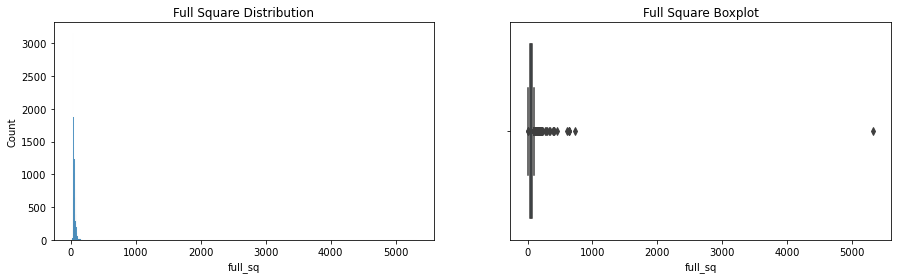

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

Врага нужно знать в лицо! Запомните эти картинки: именно так выглядят типичные графики распределений с выбросами в данных. Гистограмма, реализованная в seaborn, автоматически выбирает число столбцов, необходимое для наилучшей визуализации распределения. Когда признак содержит выбивающиеся значения, число столбцов становится очень велико и в итоге получается такая «кракозябра». 

По этой же причине получается сплюснутая под весом выбросов коробчатая диаграмма. Она помогает более чётко увидеть потенциальные аномалии, которые находятся за пределами усов (1.5 межквартильных размаха).

Одним из таких подходов является метод межквартильного размаха (его еще называют методом Тьюки), который используется для построения коробчатой диаграммы.

**Алгоритм метода**
* вычисляем 25-ый и 75-ый квантили
* вычисляем межквартильное расстояние как 75-ый - 25-ый квантили
* вычисляем верхнюю (75-ый квантиль + 1,5*(75-ый - 25-ый)) и нижнюю(25-ый квантиль - 1,5*(75-ый - 25-ый)) границы
* нахуй убираем все значения за пределами границ

В соответствии с этим алгоритмом напишем функцию `outliers_iqr()`, которая вам может ещё не раз пригодиться в реальных задачах. Эта функция принимает на вход DataFrame и признак, по которому ищутся выбросы, а затем возвращает потенциальные выбросы, найденные с помощью метода Тьюки, и очищенный от них датасет. <a class="anchor" id=6-2></a>

[к содержанию](#0)

In [31]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

Применим эту функцию к таблице `sber_data` и признаку `full_sq`, а также выведем размерности результатов:

In [32]:
outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


Согласно классическому методу Тьюки, под выбросы у нас попали 963 записи в таблице. Давайте построим гистограмму и коробчатую диаграмму на новых данных `cleaned_sber_data`:

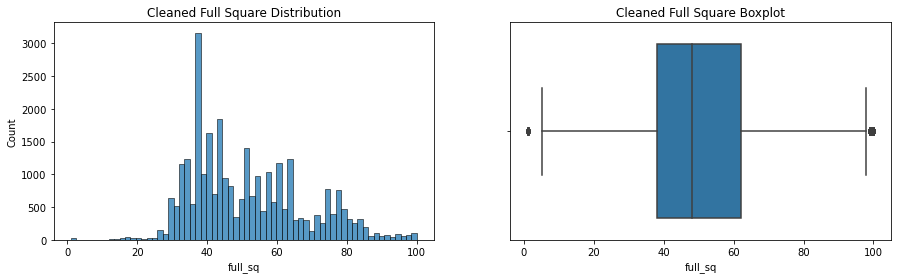

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

На первый взгляд — стерильно. Однако если присмотреться, то коробчатая диаграмма всё ещё продолжает говорить, что в данных есть одиночные выбросы с обеих сторон от границ. К тому же у нас сильно урезался диапазон жилой площади — максимальная площадь составляет около 100 кв. м. 

>?Как же так, неужели метод не работает?

Причина кроется в том, что после удаления выбросов квартили рассчитываются заново по новым данным, и так оказалось, что из-за свойств распределения были снова найдены точки, которые считаются выбросами.

>Классический метод межквартильного размаха не учитывает особенностей распределения! Он требует, чтобы данные были распределены плюс-минус **нормально** (гистограмма должна быть похожа на колокол) и требует от распределения примерной симметричности (чтобы у гистограммы были одинаковые хвосты в обе стороны).

У нас же распределение (даже после отсечения выбросов) отличается от заявленных критериев. Оно несимметрично: правый хвост изначального распределения гораздо длиннее левого (для Москвы вполне естественны квартиры с площадью свыше 100 квадратных метров) и вовсе не колоколообразно. **Попросту говоря, выбор метода поиска не оправдал себя**.

Давайте немного модифицируем функцию `outliers_iqr()`. Добавьте в неё параметры `left` и `right`, которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5). Функция, как и раньше, должна возвращать потенциальные выбросы и очищенный `DataFrame`.

Число выбросов по методу Тьюки: 59
Результирующее число записей: 30403


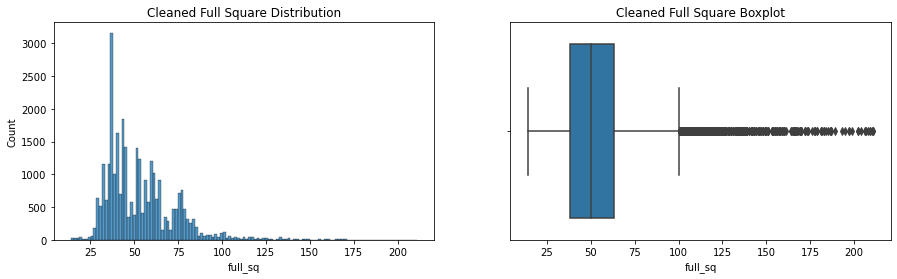

In [34]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', left=1, right=6)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

### МЕТОД Z-ОТКЛОНЕНИЙ (МЕТОД СИГМ)

Последний метод, который мы рассмотрим, — это метод, основанный **на правиле трёх сигм** для нормального распределения. 

>Правило трёх сигм гласит: если распределение данных является нормальным, то 99,73 % лежат в интервале `(m - 3*c, m + 3*c)`  где `m` (мю) — математическое ожидание (для выборки это среднее значение), `с` (сигма) — стандартное отклонение. Наблюдения, которые лежат за пределами этого интервала, будут считаться выбросами.

Схематично правило трёх сигм для нормального распределения представлено на рисунке ниже:

<img src=p_14_img7.png>

А что делать, если данные распределены **не нормально**? 

На такой случай есть один трюк. Иногда для распределений, похожих на логнормальное, может помочь **логарифмирование**. Оно может привести исходное распределение к подобию нормального. Причем, основание логарифма может быть любым.

Построим две гистограммы признака расстояния до МКАД (`mkad_km`): первая — в обычном масштабе, а вторая — в логарифмическом. Логарифмировать будем с помощью функции `log()` из библиотеки `numpy` (натуральный логарифм — логарифм по основанию числа e). Признак имеет среди своих значений 0. Из математики известно, что логарифма от 0 не существует, поэтому мы прибавляем к нашему признаку 1, чтобы не логарифмировать нули и не получать предупреждения.<a class="anchor" id=6-3></a>

[к содержанию](#0)

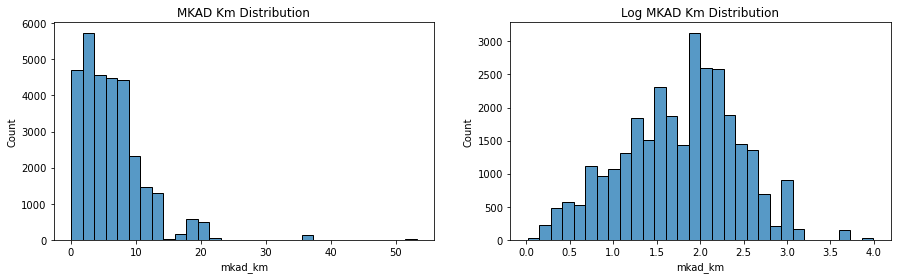

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');

Что мы тут видим? 

Левое распределение напоминает **логнормальное распределение** с наличием потенциальных выбросов-«пеньков», далеко отстоящих от основной массы наблюдений.

Взяв **натуральный логарифм от левого** распределения, мы получаем правое, которое напоминает слегка перекошенное нормальное. Слева от моды (самого высокого столбика) наблюдается чуть больше наблюдений, нежели справа. По-научному это будет звучать так: «распределение имеет левостороннюю асимметрию».

Численный показатель асимметрии можно вычислить с помощью метода: `skew()`

In [37]:
print(log_mkad_km.skew())

-0.14263612203024953


* Асимметрия распределения называется правосторонней, если она положительная:
* * As > 0
* Асимметрия распределения называется левосторонней, если она отрицательная:
* * As < 0

Давайте реализуем алгоритм метода z-отклонения. Описание алгоритма метода:
1. вычислить математическое ожидание `m` (среднее) и стандартное отклонение `с` признака `x`
2. вычислить нижнюю `(m - 3*c)` и верхнюю `(m + 3*c)` границы
3. найти наблюдения выходящие за границы

Напишем функцию `outliers_z_score()`, которая реализует этот алгоритм. 

На вход она принимает `DataFrame` и признак, по которому ищутся выбросы. В дополнение добавим в функцию возможность работы в логарифмическом масштабе: для этого введём аргумент `log_scale`. Если он равен `True`, то будем логарифмировать рассматриваемый признак, иначе — оставляем его в исходном виде.

Как и раньше, функция будет возвращать выбросы и очищенные от них данные:


In [38]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

Применим эту функцию к таблице `sber_data` и признаку `mkad_km`, а также выведем размерности результатов:

In [39]:
outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 33
Результирующее число записей: 30438


In [40]:
# В каких районах эти z-отклонения
print(outliers['sub_area'].unique())

['Poselenie Rogovskoe' 'Poselenie Kievskij']


Наши потенциальные выбросы — это квартиры из поселений «Роговское» и «Киевский». Снова обращаемся к силе интернета и «пробиваем» наших подозреваемых. Эти поселения — самые удалённые районы Московской области; первое из них — это и вовсе граница с Калужской областью. 

И тут возникает закономерный вопрос: а стоит ли считать такие наблюдения за выбросы? 

Вопрос в действительности не имеет определенного ответа: с одной стороны, метод прямо-таки говорит нам об этом, а с другой — эти наблюдения имеют право на существование, ведь они являются частью Московской области.

>Возможно, мы не учли того факта, что наш логарифм распределения всё-таки не идеально нормален и в нём присутствует некоторая асимметрия. Возможно, стоит дать некоторое «послабление» на границы интервалов? Давайте отдельно построим гистограмму прологарифмированного распределения, а также отобразим на гистограмме вертикальные линии, соответствующие среднему (центру интервала в методе трёх сигм) и границы интервала . Вертикальные линии можно построить с помощью метода `axvline()`. Для среднего линия будет обычной, а для границ интервала — пунктирной (параметр `ls ='--'`):

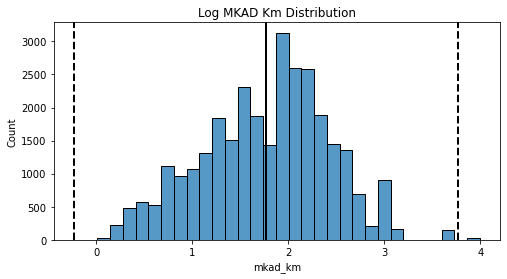

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');

Итак, что мы графически построили интервал метода трёх сигм поверх нашего распределения. Он показывает, какие наблюдения мы берем в интервал, а какие считаем выбросами. Легко заметить, среднее значение (жирная вертикальная линия) находится левее моды, это свойство распределений с левосторонней асимметрией. Также видны наблюдения, которые мы не захватили своим интервалом (небольшой пенек правее верхней границы) — это и есть наши квартиры из из поселений "Роговское" и "Киевский". Очевидно, что если немного (меньше чем на одну сигму) "сдвинуть" верхнюю границу вправо, мы захватим эти наблюдения. Давайте сделаем это?!

Число выбросов по методу z-отклонения: 0
Результирующее число записей: 30471


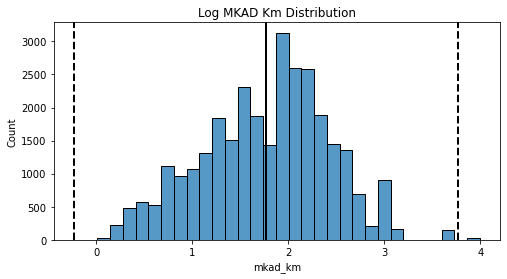

In [42]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', log_scale=True, left=3, right=3.5)

print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');

### РЕЗЮМЕ ПО МЕТОДАМ ПОИСКА ВЫБРОСОВ

Мы рассмотрели классические методы выявления аномальных данных. Как вы сами поняли, каждый из них имеет свои преимущества и недостатки.

* **Метод ручного поиска тяжело автоматизировать**, однако вы сами организовываете проверки, следите за процессом отсеивания выбросов и руководствуетесь не только статистикой, но и здравым смыслом. К тому же из всех представленных только этот метод способен выявить логические нестыковки в данных (например, общая площадь меньше жилой или число этажей более 77 в районе, где нет таких зданий). Обычно этот метод используется в комплексе с другими, чтобы удостовериться в том, что найденные данные действительно являются выбросами, и произвести логическую очистку, на которую неспособны другие методы.
* **Методы межквартильного размаха и z-отклонений довольно просты в реализации и основаны на стройной математической теории**, а не на эвристиках. Но это их преимущество и недостаток. Оба метода разработаны для данных, распределённых приблизительно нормально. Проблема в том, что **далеко не всё в мире имеет нормальное распределение**. Необходимо внимательно «рыться» в данных, совершать дополнительные преобразования, чтобы привести их хотя бы к подобию нормального распределения, либо подбирать границы методов, чтобы учитывать особенности распределений. В противном случае методы начинают считать выбросами всё, что не вписывается в жёсткие границы, и вы рискуете лишиться важных данных! Учитывайте это в своей работе и всегда проверяйте результаты.

### ДРУГИЕ МЕТОДЫ ПОИСКА ВЫБРОСОВ

Конечно, наука о данных не ограничивается тремя методами. Скажем даже больше: в машинном обучении есть отдельная активно развивающаяся подобласть, именуемая **`Outliers (Anomaly) Detection`**. Она включает в себя большое количество методов для поиска аномалий в совершенно различных видах данных: от временных рядов до географических данных. Специалисты этой области обучают целые модели, которые помогают отыскать выбросы в данных. 

Мы рассмотрели самые простые, но очень распространённые методы поиска выбросов, главный недостаток которых состоит в том, что они основываются на информации только по одному признаку. Для глубокого поиска аномалий могут применяться методы, которые используют информацию обо всех признаках.

Например, для поиска аномалий часто используется метод кластеризации `DBSCAN`, о котором мы ещё будем говорить в модуле по кластеризации данных далее. Метод пытается объединить данные в группы (кластеры), например: квартиры низкого, среднего и премиального класса, опираясь на все признаки. Всё, что не попало ни в какой из кластеров, помечается как выброс (шум). <a class="anchor" id=6-4></a>

[к содержанию](#0)

<img src=p_14_img8.png>

-0.6867147547476372

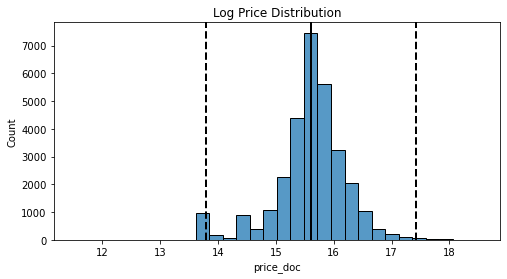

In [44]:
# 6.5 Постройте гистограмму для признака price_doc в логарифмическом масштабе. 
# А также, добавьте на график линии, отображающие среднее и границы интервала для метода трех сигм. 
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_price, bins=30, ax=ax)
histplot.axvline(log_price.mean(), color='k', lw=2)
histplot.axvline(log_price.mean()+ 3 * log_price.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price.mean()- 3 * log_price.std(), color='k', ls='--', lw=2)
display(log_price.skew())
histplot.set_title('Log Price Distribution');

In [45]:
# 6.6 Найдите потенциальные выбросы с помощью метода z-отклонения. 
# Используйте логарифмический масштаб распределения. 
# Сделайте «послабление» на 0.7 сигм в в обе стороны распределения. Сколько выбросов вы получили?

outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', log_scale=True, left=3.7, right=3.7)

print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 52
Результирующее число записей: 30419


In [46]:
# 6.7 Добавьте фишку с логарифмированием в свою функцию outliers_iqr_mod(). 
# Добавьте в неё параметр log_scale. Если он выставлен в True, 
# то производится логарифмирование признака. Примените полученную функцию к признаку price_doc. 
# Число межквартильных размахов в обе стороны обозначьте как 3. 
# Чему равно число выбросов, полученных таким методом?
def outliers_iqr_mod(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 3)
    upper_bound = quartile_3 + (iqr * 3)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', log_scale=True)

print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


Число выбросов по методу Тьюки: 92
Результирующее число записей: 30379


## 7. Работа с дубликатами и неинформативными признаками<a class="anchor" id=7></a>

>**Дубликатами** называются записи, для которых значения (всех или большинства) признаков совпадают. 

Дублирующаяся информация никогда не приводит **ни к чему хорошему**. В `Data Science` одинаковые записи не несут полезной информации и искажают реальную статистику. Модель несколько раз видит одно и то же наблюдение и начинает подстраиваться под него. Если дубликатов много, это может стать большой проблемой при обучении.

### ОБНАРУЖЕНИЕ И ЛИКВИДАЦИЯ ДУБЛИКАТОВ

[к содержанию](#0)

Способ обнаружения дубликатов зависит от того, что именно вы считаете дубликатом. Например, за дубликаты можно посчитать записи, у которых совпадают все признаки или их часть. Если в таблице есть столбец с уникальным идентификатором (`id`), вы можете попробовать поискать дубликаты по нему: одинаковые записи могут иметь одинаковый `id`.

Проверим, есть у нас такие записи: для этого сравним число уникальных значений в столбце id с числом строк. Число уникальных значений вычислим с помощью метода `nunique()`:


In [47]:
sber_data['id'].nunique() == sber_data.shape[0]

True

>Вроде бы всё в порядке: каждой записи в таблице соответствует свой уникальный идентификатор. Но это ещё не означает, что в таблице нет дубликатов!

Столбец с `id` задаёт каждой строке свой уникальный номер, поэтому сама по себе каждая строка является уникальной. **Однако содержимое других столбцов может повторяться.**

Чтобы отследить дубликаты, можно воспользоваться методом [duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html), который возвращает булеву маску для фильтрации. Для записей, у которых совпадают признаки, переданные методу, он возвращает `True`, для остальных — `False`.

У метода есть параметр `subset` — список признаков, по которым производится поиск дубликатов. По умолчанию используются все столбцы в `DataFrame` и ищутся **полные дубликаты**.

Найдём число полных дубликатов таблице `sber_data`. Предварительно создадим список столбцов `dupl_columns`, по которым будем искать совпадения (все столбцы, не включая `id`). 

Создадим маску дубликатов с помощью метода `duplicated()` и произведём фильтрацию. Результат заносим в переменную `sber_duplicates`. Выведем число строк в результирующем `DataFrame`:

In [48]:
dupl_columns = list(sber_data.columns)
dupl_columns.remove('id')

mask = sber_data.duplicated(subset=dupl_columns)
sber_duplicates = sber_data[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

Число найденных дубликатов: 562


Итак, **562 строки** в таблице являются полными копиями других записей. Ручной поиск совпадающих строк по 30 тысячам записей был бы практически невыполним, а с помощью `pandas` мы быстро, а главное, легко обнаружили дублирующиеся данные! <a class="anchor" id=7-1></a>

Теперь нам необходимо от них избавиться. Для этого легче всего воспользоваться методом [drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html), который удаляет повторяющиеся записи из таблицы. 

In [49]:
sber_dedupped = sber_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {sber_dedupped.shape[0]}')

Результирующее число записей: 29909


### ОБНАРУЖЕНИЕ И ЛИКВИДАЦИЯ НЕИНФОРМАТИВНЫХ ПРИЗНАКОВ

[к содержанию](#0)

Чтобы считать признак неинформативным, прежде всего нужно задать какой-то **определённый порог**. Например, часто используют пороги в **0.95 и 0.99**. Это означает: признак неинформативен, если в нем **95 % (99 %) одинаковых значений** или же 95 % (99 %) данных полностью уникальны.

К сожалению, в pandas пока нет волшебной палочки, которая мгновенно бы выдавала список столбцов, обладающих низкой информативностью. Однако процедура их поиска легко реализуется вручную.

**Разберём алгоритм:**

1. Создаём пустой список `low_information_cols`, куда будем добавлять названия признаков, которые мы посчитаем неинформативными.

2. В цикле пройдёмся по всем именам столбцов в таблице и для каждого будем совершать следующие действия:

* рассчитаем `top_freq` — наибольшую относительную частоту с помощью метода `value_counts()` с параметром `normalize=True`. Метод вернёт долю от общих данных, которую занимает каждое уникальное значение в признаке.

* Отсюда нам нужен максимум.

3. Рассчитаем `nunique_ratio` — отношение числа уникальных значений в столбце к размеру всего столбца. Число уникальных значений в столбце получим с помощью метода `nunique()`, а размер признака — с помощью метода `count()`. Например, для столбца `id` число уникальных значений — 30471; оно же равно размеру таблицы. Поэтому результат отношения будет 1.

4. Cравним каждое из полученных чисел с пороговым значением **(у нас это 0.95)** и добавим в список неинформативных признаков, если условие истинно.

In [50]:
#список неинформативных признаков
low_information_cols = [] 
#цикл по всем столбцам
for col in sber_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = sber_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = sber_data[col].nunique() / sber_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

id: 100.0% уникальных значений
oil_chemistry_raion: 99.03% одинаковых значений
railroad_terminal_raion: 96.27% одинаковых значений
nuclear_reactor_raion: 97.17% одинаковых значений
big_road1_1line: 97.44% одинаковых значений
mosque_count_1000: 98.08% одинаковых значений


Итак, мы нашли **шесть неинформативных признаков**. Теперь можно удалить их с помощью метода `drop()`, передав результирующий список в его аргументы.  <a class="anchor" id=7-2></a>

In [51]:
information_sber_data = sber_data.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_sber_data.shape[1]}')

Результирующее число признаков: 55


Однако всегда **следует скептически относиться** к результатам, которые предоставил алгоритм поиска неинформативных признаков. В противном случае можно лишиться важных данных. 

Например, в ваших данных есть признак цены акций, которая всё время меняется. В каждый момент времени её цена уникальна, то есть число уникальных значений в столбце совпадает с размером столбца. Казалось бы, по критерию информативности это кандидат на выбывание, но если мы рассматриваем задачу предсказания спроса на эти самые акции, то очевидно, что цена — это очень важный фактор, несмотря на свою уникальность. Именно цена на акции определяет спрос на них.

Могут возникнуть ситуации, когда присутствует огромная разница в частотах для каждого уникального значения в столбце, но это вовсе не значит, что признак неинформативен. Например, у нас могут быть данные о различных переводах между счетами пользователей. В этих данных может быть очень важный признак мошенничества (два возможных значения — да и нет). Как правило, соотношение между мошенниками и обычными пользователями около — 2/98 % (мошенников 1-2 %, а обычных пользователей — 98-99 %). Но стоит ли удалять данный признак из данных зависит от поставленной перед нами задачи.

Будьте внимательны и рассудительны при поиске неинформативных признаков. Лучшее решение — для начала использовать все признаки для построения базовой модели, а затем уже выбирать те, которые обладают наибольшей информативностью.

Более подробно мы рассмотрим данные нюансы в блоке по машинному обучению.

### ВАЖНОСТЬ ПРИЗНАКОВ

[к содержанию](#0)

На самом деле информативность признаков определяется не только числом уникальных значений, но и их влиянием на целевой признак (тот, который мы хотим предсказать). Это называется **важностью признака.** 

Признаки, которые обладают низкой важностью, называют **нерелевантными** признаками. 

>Например, если бы в наших данных о квартирах был признак, содержащий информацию о температуре воздуха за окном, он был бы нерелевантным.

Нерелевантные признаки могут быть не такими очевидными. В таких случаях применяются более сложные способы их поиска с использованием статистики и моделей машинного обучения. Мы поговорим об этом позже, когда вплотную подойдём к `Machine Learning`.

## 8. Закрепление знаний<a class="anchor" id=8></a>

Вам предоставлен [набор данных](https://lms.skillfactory.ru/assets/courseware/v1/6559ab1e1d17acac79bec5dc8052261b/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/diabetes_data.zip), первоначально полученный в Национальном институте диабета, болезней органов пищеварения и почек. 

Этот набор данных создан для того, чтобы на основе определённых диагностических измерений предсказать, есть ли у пациента диабет. 

На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индейского происхождения Пима.

Прочитаем наши данные и выведем первые пять строк таблицы:

[к содержанию](#0)

In [10]:
diabetes = pd.read_csv('diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


### Признаки

* `Pregnancies` — количество беременностей.
* `Glucose` — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.
* `BloodPressure` — диастолическое артериальное давление 
* `SkinThickness` — толщина кожной складки трицепса (мм).
* `Insulin` — двухчасовой сывороточный инсулин (ме Ед/мл).
* `BMI` — индекс массы тела (вес в кг / (рост в м)2 )
* `DiabetesPedigreeFunction` — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).
* `Age` — возраст.
* `Outcome` — наличие диабета (0 — нет, 1 — да).

Предварительно вы можете провести небольшой разведывательный анализ: посмотреть на распределения признаков и оценить их взаимосвязь с признаком наличия диабета.

In [53]:
# 8.1 Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. 
# Для поиска используйте все признаки в данных. Сколько записей осталось в данных?
dupl_columns = list(diabetes.columns)

mask = diabetes.duplicated(subset=dupl_columns)
diabetes_duplicates = diabetes[mask]
print(f'Число найденных дубликатов: {diabetes_duplicates.shape[0]}')
diabetes_dedupped = diabetes.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {diabetes_dedupped.shape[0]}')

Число найденных дубликатов: 10
Результирующее число записей: 768


In [54]:
# 8.2 Далее найдите все неинформативные признаки в данных и избавьтесь от них. 
# В качестве порога информативности возьмите 0.99: удалите все признаки, для которых 99 % значений повторяются или 99 % записей уникальны. 
# В ответ запишите имена признаков, которые вы нашли (без кавычек).
#список неинформативных признаков
low_information_cols = [] 
#цикл по всем столбцам
for col in diabetes_dedupped.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_dedupped[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_dedupped[col].nunique() / diabetes_dedupped[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.99:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.99:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        
diabetes_data = diabetes_dedupped.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {diabetes_data.shape[1]}')

Gender: 100.0% одинаковых значений
Результирующее число признаков: 9


In [55]:
# 8.3 Попробуйте найти пропуски в данных с помощью метода isnull().
# Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)
# Какая доля пропусков содержится в столбце Insulin?
cols_null_percent = diabetes_data.isnull().mean()
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
print('Доля пропусков в столбце Insuline:',round(cols_with_null['Insulin'],2))
print(f'Результирующее число признаков: {diabetes_data.shape[1]}')
cols_null_percent.sort_values(ascending=False)

Доля пропусков в столбце Insuline: 0.49
Результирующее число признаков: 9


Insulin                     0.486979
SkinThickness               0.295573
BloodPressure               0.045573
BMI                         0.014323
Glucose                     0.006510
Pregnancies                 0.000000
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [56]:
# 8.4 Удалите из данных признаки, где число пропусков составляет более 30 %. 
# Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

#создаем копию исходной таблицы
drop_data = diabetes_data.copy()
display(drop_data.shape)
#задаем минимальный порог: вычисляем 30% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(how='any', thresh=thresh, axis=1)
#отображаем результирующую долю пропусков
display(drop_data.isnull().mean().sort_values(ascending=False))
print(f'Результирующее число признаков: {drop_data.shape[1]}')

(768, 9)

SkinThickness               0.295573
BloodPressure               0.045573
BMI                         0.014323
Glucose                     0.006510
Pregnancies                 0.000000
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

Результирующее число признаков: 8


In [57]:
# 8.5 Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. 
# Чему равно результирующее число записей в таблице?
drop_data = drop_data.dropna(how='any',thresh=drop_data.shape[1]-2, axis=0)
drop_data.shape[0]


761

In [58]:
# 8.6 В оставшихся записях замените пропуски на медиану. 
# Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

#создаём копию исходной таблицы
combine_data = diabetes.copy()
combine_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = combine_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

#удаляем столбец Gender
combine_data = combine_data.drop('Gender', axis=1)

#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = combine_data.shape[0] #число строк в таблице
thresh = n*0.7
combine_data = combine_data.dropna(how='any', thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] #число признаков после удаления столбцов
combine_data = combine_data.dropna(how='any', thresh=m-2, axis=0)

#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'Pregnancies': combine_data['Pregnancies'].median(),
    'Glucose': combine_data['Glucose'].median(),
    'BloodPressure': combine_data['BloodPressure'].median(),
    'SkinThickness': combine_data['SkinThickness'].median(),
    'BMI': combine_data['BMI'].median(),
    'DiabetesPedigreeFunction': combine_data['DiabetesPedigreeFunction'].median(),
    'Age': combine_data['Age'].median(),
    'Outcome': combine_data['Outcome'].median()
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
display(combine_data.shape)
print(round(combine_data['SkinThickness'].mean(),1))

(771, 8)

29.1


In [59]:
# 8.7 Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?
outliers, cleaned = outliers_iqr(combine_data, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 684


In [60]:
# 8.8 Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?
outliers, cleaned = outliers_z_score(combine_data, 'SkinThickness')
print(f'Число выбросов по методу z-отклонений: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонений: 4
Результирующее число записей: 767


In [61]:
# 8.9 Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.
def outliers_iqr_mod(data, feature, log_scale=False, left=1.5, right=1.5):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(combine_data, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
# Затем найдите число выбросов в этом же признаке в логарифмическом масштабе. 
# Какова разница между двумя этими числами (вычтите из первого второе)?
outliers, cleaned = outliers_iqr_mod(combine_data, 'DiabetesPedigreeFunction', log_scale=True)
print(f'Число выбросов по методу Тьюки(данные логорифмированны): {outliers.shape[0]}')

Число выбросов по методу Тьюки: 29
Число выбросов по методу Тьюки(данные логорифмированны): 0


## 9. Итоги<a class="anchor" id=9></a>

[к содержанию](#0)

Если вы захотите углубиться в очистку данных и статистические методы, то вашему вниманию предлагается дополнительная литература:

* Статья [Подготовка данных в Data Science-проекте: рецепты для молодых хозяек](https://habr.com/ru/post/470650/) (Хабр). Автор описывает общие подходы к очистке данных и какое место очистка занимает в бизнес-проекте.

* [Замечательная книга](https://itfy.org/threads/kniga-o-biblioteke-pandas-pandas-rabota-s-dannymi-abdraxmanov-m-i.1262/), [Link_2](https://dnevnikru-my.sharepoint.com/personal/s_dyagilev12_dnevnik_ru/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fs_dyagilev12_dnevnik_ru%2FDocuments%2FАбдрахманов%20М%2EИ%2E%20-%20Pandas%2E%20Работа%20с%20данными%20-%202020%2Epdf&parent=%2Fpersonal%2Fs_dyagilev12_dnevnik_ru%2FDocuments&ga=1) которую вы можете использовать как справочник при работе с `pandas`. 

* Тем, кто хочет познакомиться с высокоуровневыми методами поиска выбросов, которые мы не рассмотрели в модуле, рекомендуем эту [статью](https://dyakonov.org/2017/04/19/поиск-аномалий-anomaly-detection/) по Anomaly Detection.

### И ЭТО ЕЩЁ НЕ ВСЁ!

Знания по темам этого модуля зачастую проверяют работодатели на собеседованиях. Предлагаем вам ознакомиться с вопросом, с которым вы можете столкнуться при поиске работы. 

Имеются [две базы данных](https://lms.skillfactory.ru/assets/courseware/v1/958d35ff25f2486f65613da4459e6647/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/Data_TSUM.xlsx) (два листа Excel-файла): база с ценами конкурентов (`Data_Parsing`) и внутренняя база компании (`Data_Company`).

В базе парсинга есть два `id`, однозначно определяющие товар: `producer_id` и `producer_color`.

В базе компании есть два аналогичных поля: `item_id` и `color_id`.

Нам известно, что коды в двух базах отличаются наличием набора служебных символов. В базе парсинга встречаются следующие символы: `_, -, ~, \\, /.`

### Необходимо:

1. Считать данные из `Excel` в DataFrame (`Data_Parsing`) и (`Data_Company`).

2. Подтянуть к базе парсинга данные из базы компании (`item_id`, `color_id`, `current_price`) и сформировать столбец разницы цен в % (цена конкурента к нашей цене).

3. Определить сильные отклонения от среднего в разности цен в пределах бренда-категории (то есть убрать случайные выбросы, сильно искажающие сравнение). Критерий — по вкусу, написать комментарий в коде.

4. Записать новый файл `Excel` с базой парсинга, приклееными к ней столбцами из пункта 2 и с учётом пункта 3 (можно добавить столбец `outlier` и проставить `Yes` для выбросов).


In [11]:
Data_Parsing = pd.read_excel('Data_Parsing.xlsx')
Data_Company = pd.read_excel('Data_Company.xlsx')
display(Data_Parsing)
display(Data_Company)

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa1111_11,black,167
1,Valentino,Shoes,aaaaa1111_12,black,188
2,Valentino,Shoes,aaaaa1111_13,black,184
3,Valentino,Shoes,aaaaa1111_14,bla//ck,196
4,Valentino,Shoes,aaaaa1111_15,bla\\ck,250
...,...,...,...,...,...
70,Stone Island,Bags,sssss1111_31,~~~red,164
71,Stone Island,Bags,sssss1111_32,~~~red,158
72,Stone Island,Bags,sssss1111_33,~~~red,194
73,Stone Island,Bags,sssss1111_34,~~~red,256


,brand,Category,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,153
...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,222


In [64]:
# Определим корявую функцию, которая уберёт спец символы из переданной в неё строки:
def getout_symbols(arg):
    symbols = ['_', ',', '-', ';', '~', ':', '/', '.', '\\' , ' ']
    check_list = list(arg)
    result_list = []
    result = ''
    for i in check_list:
        if i not in symbols:
            result_list.append(i)
    for y in result_list:
        result+=y
    return result


# Применим написанную функцию на столбец с producer_id и на столбец producer_color
Data_Parsing['producer_id'] = Data_Parsing['producer_id'].apply(getout_symbols)
Data_Parsing['producer_color'] = Data_Parsing['producer_color'].apply(getout_symbols)

# подтянем в базу с парсингом данные из базы компании

new_data = Data_Parsing.merge(
    Data_Company, 
    left_on='producer_id', 
    right_on='item_id',
)
new_data


,brand_x,Category_x,producer_id,producer_color,price,brand_y,Category_y,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,167,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,188,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,184,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,196,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,250,Valentino,Shoes,aaaaa111115,black,153
...,...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,Stone Island,Bags,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,158,Stone Island,Bags,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,194,Stone Island,Bags,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,256,Stone Island,Bags,sssss111134,red,222


In [72]:
# Добавим столбец разницы цен в % (цена конкурента к нашей цене)
new_data['dif_price_%'] = round((new_data['price'] / new_data['current price']) * 100, 2)
new_data

,brand_x,Category_x,producer_id,producer_color,price,brand_y,Category_y,item_id,color_id,current price,dif_price_%
0,Valentino,Shoes,aaaaa111111,black,167,Valentino,Shoes,aaaaa111111,black,247,67.61
1,Valentino,Shoes,aaaaa111112,black,188,Valentino,Shoes,aaaaa111112,black,161,116.77
2,Valentino,Shoes,aaaaa111113,black,184,Valentino,Shoes,aaaaa111113,black,234,78.63
3,Valentino,Shoes,aaaaa111114,black,196,Valentino,Shoes,aaaaa111114,black,167,117.37
4,Valentino,Shoes,aaaaa111115,black,250,Valentino,Shoes,aaaaa111115,black,153,163.40
...,...,...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,Stone Island,Bags,sssss111131,red,165,99.39
71,Stone Island,Bags,sssss111132,red,158,Stone Island,Bags,sssss111132,red,196,80.61
72,Stone Island,Bags,sssss111133,red,194,Stone Island,Bags,sssss111133,red,236,82.20
73,Stone Island,Bags,sssss111134,red,256,Stone Island,Bags,sssss111134,red,222,115.32


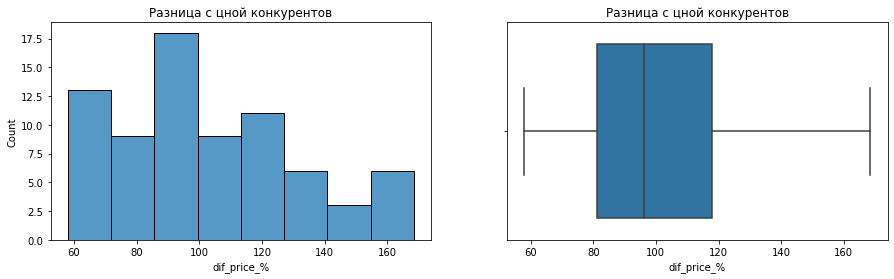

In [75]:
# Определить сильные отклонения от среднего в разности цен в пределах бренда-категории 
# (то есть убрать случайные выбросы, сильно искажающие сравнение). 
# Критерий — по вкусу, написать комментарий в коде.
new_data['dif_price_%'].describe()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=new_data, x='dif_price_%', ax=axes[0]);
histplot.set_title('Разница с цной конкурентов');
boxplot = sns.boxplot(data=new_data, x='dif_price_%', ax=axes[1]);
boxplot.set_title('Разница с цной конкурентов');

In [89]:
# Введём признак по разнице в цене (yes - если у конкурента дороже в 1.5 раза либо дешевле на 40%)
new_data['outlier'] = new_data['dif_price_%'].apply(lambda x: 'yes' if x > 150 or x < 60 else 'no')
# Введём признак дороже ли како-либо товар у конкурента (yes - дороже, no - дешевле)
new_data['price_bigger'] = new_data['dif_price_%'].apply(lambda x: 'yes' if x > 100 else 'no')
new_data


,brand_x,Category_x,producer_id,producer_color,price,brand_y,Category_y,item_id,color_id,current price,dif_price_%,outlier,price_bigger
0,Valentino,Shoes,aaaaa111111,black,167,Valentino,Shoes,aaaaa111111,black,247,67.61,no,no
1,Valentino,Shoes,aaaaa111112,black,188,Valentino,Shoes,aaaaa111112,black,161,116.77,no,yes
2,Valentino,Shoes,aaaaa111113,black,184,Valentino,Shoes,aaaaa111113,black,234,78.63,no,no
3,Valentino,Shoes,aaaaa111114,black,196,Valentino,Shoes,aaaaa111114,black,167,117.37,no,yes
4,Valentino,Shoes,aaaaa111115,black,250,Valentino,Shoes,aaaaa111115,black,153,163.40,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,Stone Island,Bags,sssss111131,red,165,99.39,no,no
71,Stone Island,Bags,sssss111132,red,158,Stone Island,Bags,sssss111132,red,196,80.61,no,no
72,Stone Island,Bags,sssss111133,red,194,Stone Island,Bags,sssss111133,red,236,82.20,no,no
73,Stone Island,Bags,sssss111134,red,256,Stone Island,Bags,sssss111134,red,222,115.32,no,yes


In [12]:
new_data.to_excel('New Data.xlsx')

NameError: name 'new_data' is not defined